In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

from pandas import set_option
#set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from scipy.stats import truncnorm
from sklearn.ensemble import RandomForestClassifier

In [2]:
filename = 'distData.txt'
data = pd.read_csv(filename, sep=',')

#x = pd.DataFrame(data)
#y = pd.DataFrame(data.Cachg)

#Prepare predictors and response columns

correct_Pattern_labels = data[data.columns[-1]].values
feature_vectors = data.drop(data.columns[-1],axis=1)

from sklearn.ensemble import RandomForestRegressor

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

testsize = 0.3
rstate = random.randrange(1,999999999,1)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, correct_Pattern_labels, test_size = testsize, random_state = rstate)


In [3]:
# Estimate the score on the entire dataset, with no missing values
rstate = random.randrange(1,999999999,1)
estimator = RandomForestRegressor(random_state = rstate, n_estimators = 100, n_jobs = 12, min_samples_leaf=10)
train = estimator.fit(X_train, y_train)
pred = estimator.predict(X_test)

In [4]:
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(estimator, X_train, y_train, cv=5)
score = cvscore.mean()
print("Score with the entire dataset = %.2f" % score)

Score with the entire dataset = 0.57


In [5]:
cvscore

array([0.53655357, 0.49075896, 0.59763907, 0.56037897, 0.64462473])

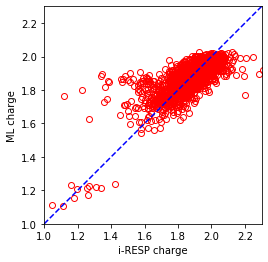

In [32]:
# Plot outputs
import pylab as pl
fig = pl.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
pl.plot(y_test, pred,'ro',fillstyle='none')
pl.xlim(1,2.3)
pl.ylim(1,2.3)
pl.plot([1,3],[1,3], '--b')
pl.xlabel('i-RESP charge')
pl.ylabel('ML charge')
pl.show()

In [33]:
from scipy.stats import kde
nbins=300
k = kde.gaussian_kde([y_train,estimator.predict(X_train)])
xi, yi = np.mgrid[y_test.min():y_test.max():nbins*1j, pred.min():pred.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))


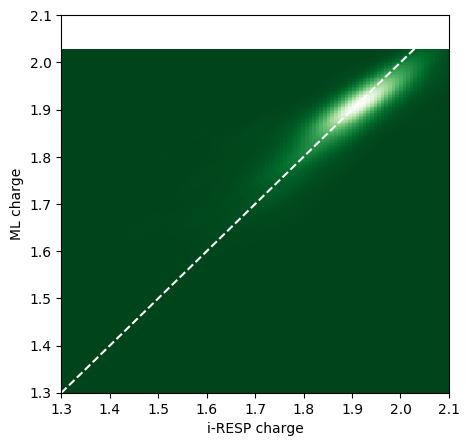

In [34]:
# Make the plot
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_xlim(1.3,2.1)
ax.set_ylim(1.3,2.1)
plt.xlabel('i-RESP charge')
plt.ylabel('ML charge')
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto',cmap=plt.cm.Greens_r)
plt.plot([1,3],[1,3], '--w')
plt.show()


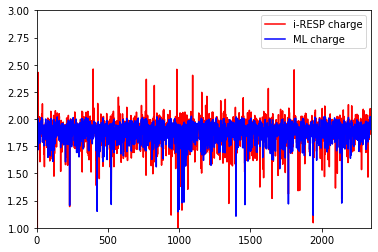

In [36]:
y_test1 = np.asarray(y_test)
data_size=len(y_test1)
fig = pl.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0, int(data_size +3))
ax.set_ylim(1, 3)
pl.plot(y_test1, color='red', label = 'i-RESP charge')
pl.plot(pred, color='blue', label = 'ML charge')
pl.legend(loc='best')
pl.show()

In [6]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test,pred))
print(r2_score(y_test, pred))

0.05510789318254649
0.007240776638114567
0.5484576218202204


In [38]:
from scipy.stats.stats import pearsonr
print(pearsonr(y_test1, pred))

(0.7243308825082131, 0.0)


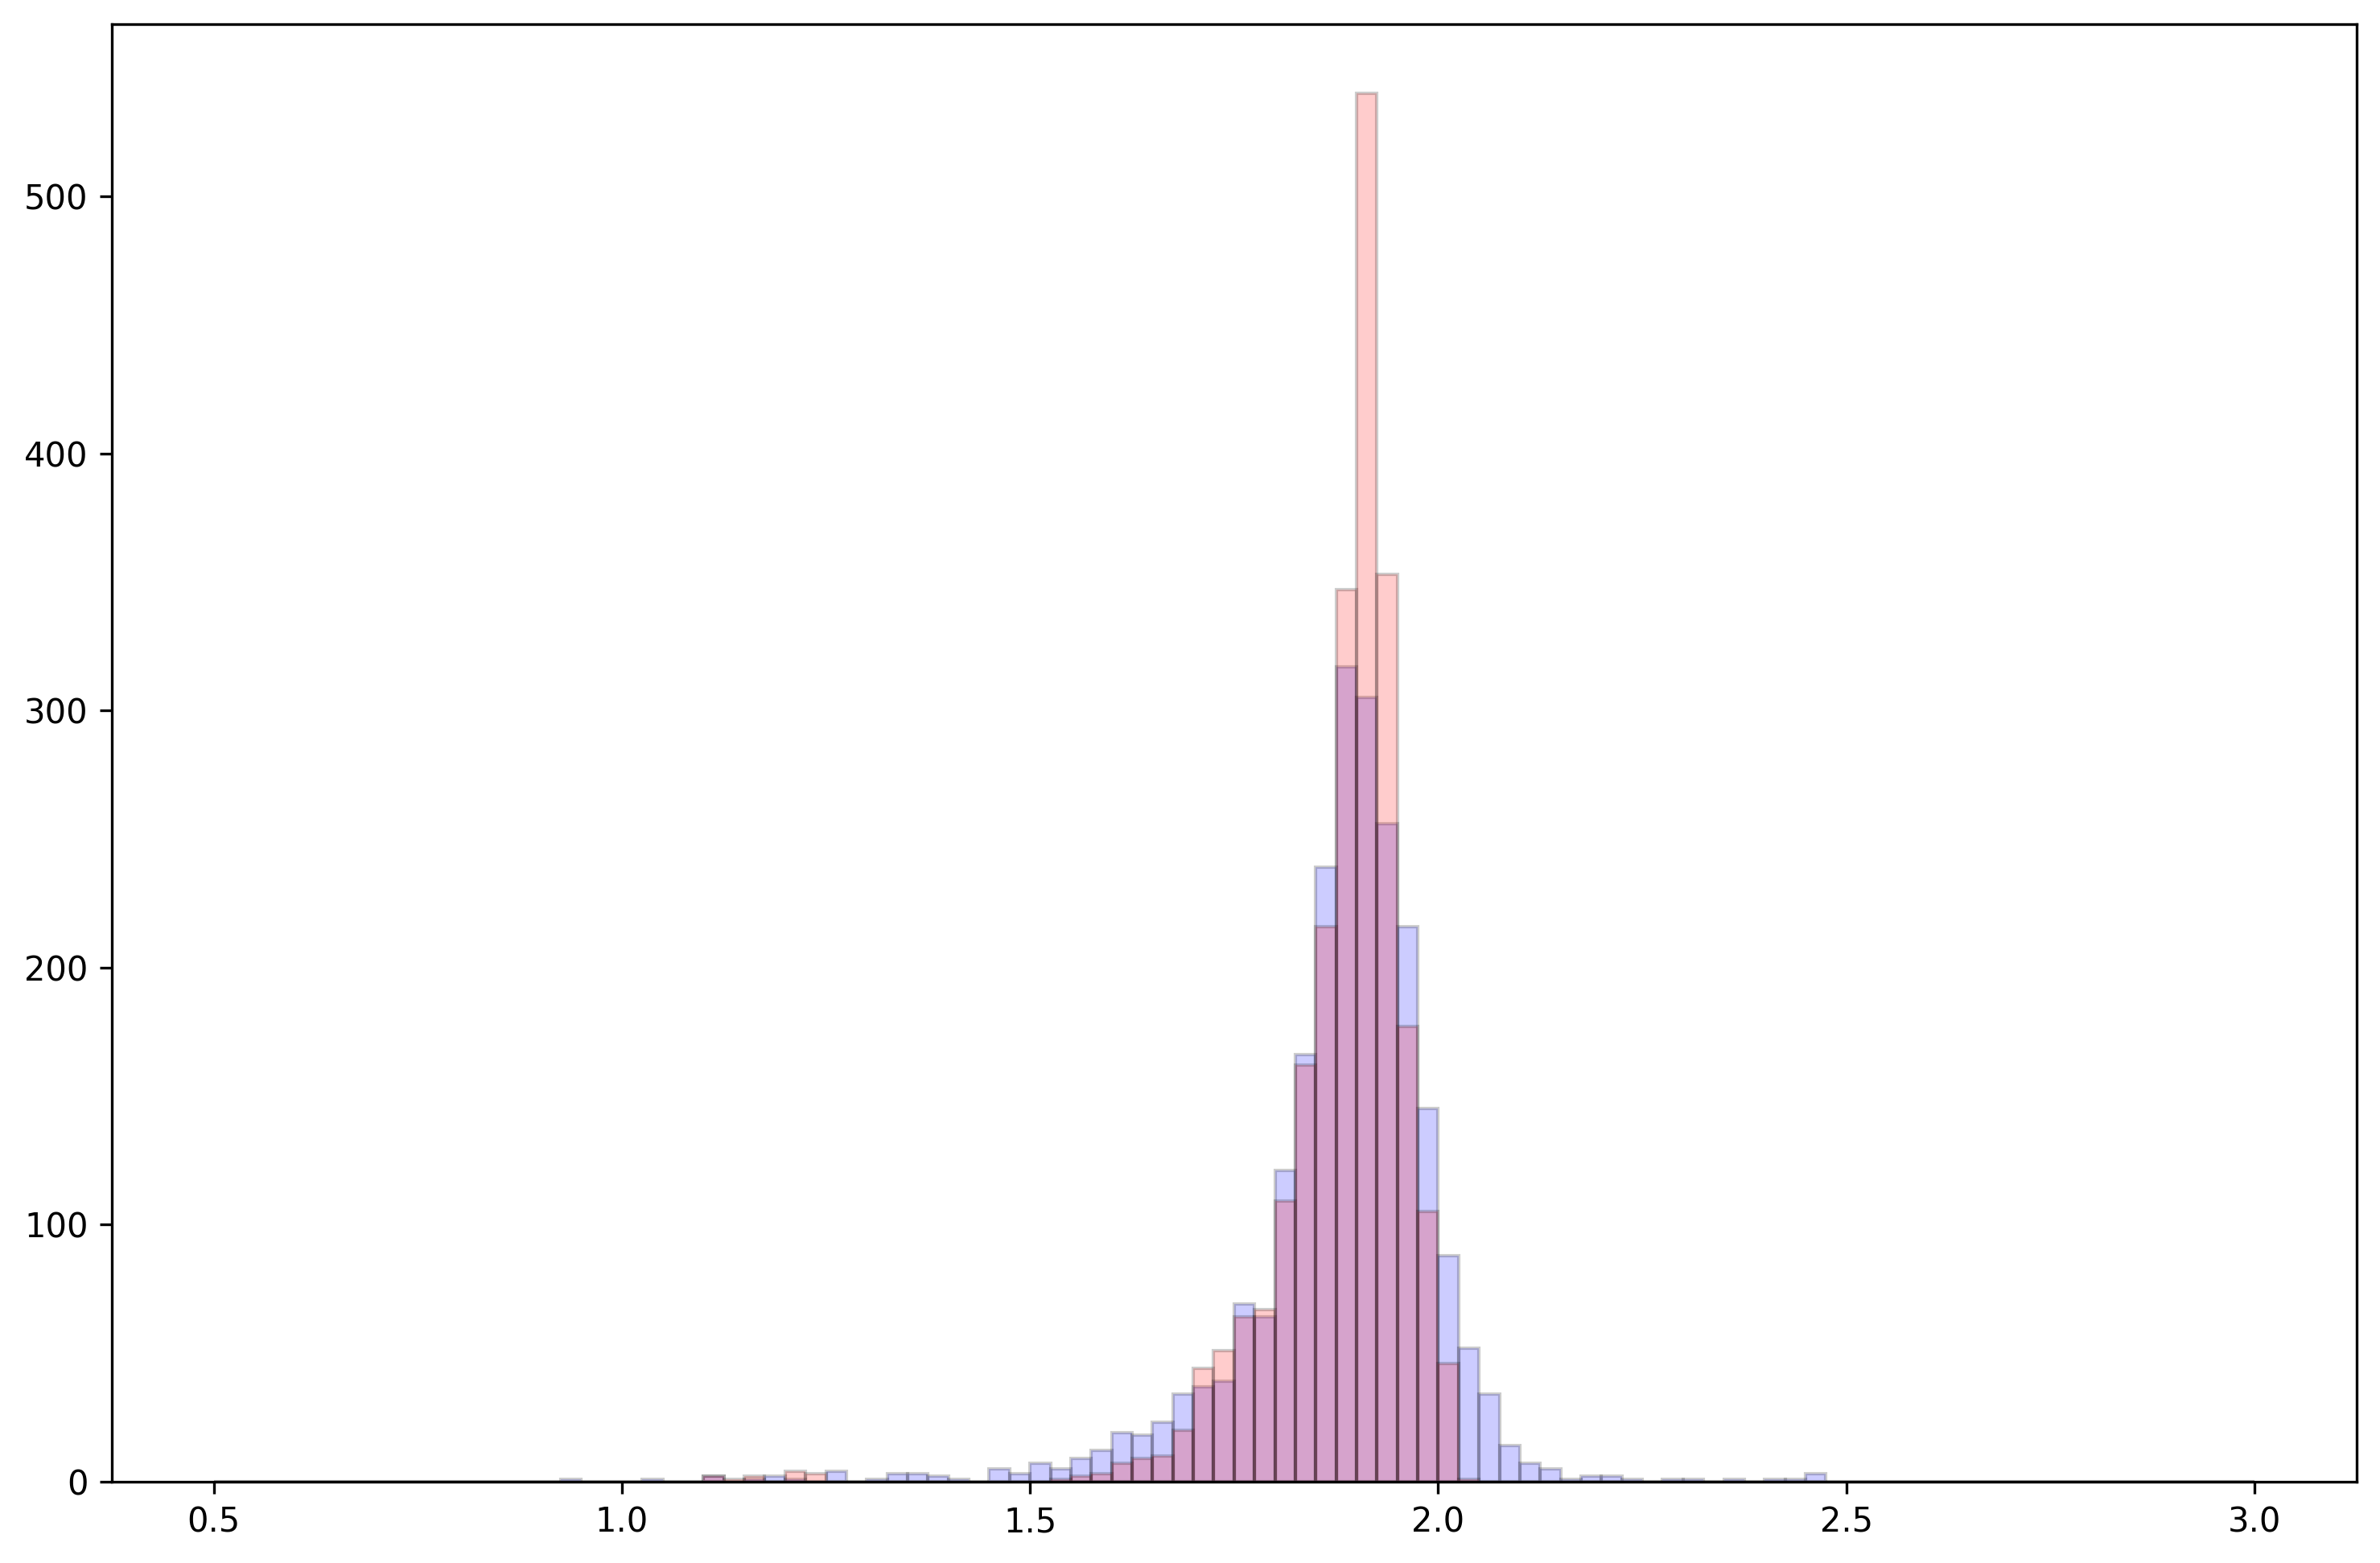

In [39]:
fig=plt.figure(figsize=(12,8), dpi= 300, facecolor='w', edgecolor='k')
data_hist = plt.hist(y_test1, color = 'blue', alpha = 0.2, edgecolor = 'black', bins = 100, range = (0.5,3))
pred_hist = plt.hist(pred, color = 'red', alpha = 0.2, edgecolor = 'black', bins = 100, range = (0.5,3))

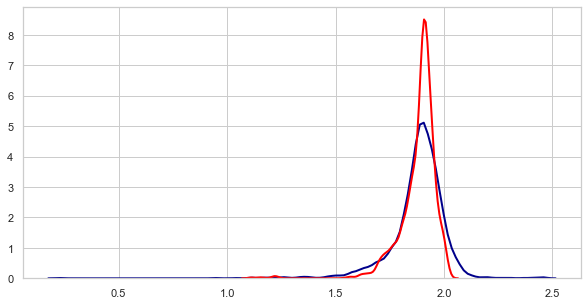

In [40]:
# Density Plot and Histogram 
import seaborn as sns
sns.set(style='whitegrid',
        rc={'lines.linewidth': 2.5,
        'figure.figsize': (10,5),
        'text.usetex': False})
sns.distplot(y_test1, hist=False, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black','range':(0.5,3)},
             kde_kws={'linewidth': 2})
sns.distplot(pred, hist=False, kde=True, 
             bins=100, color = 'red', 
             hist_kws={'edgecolor':'black','range':(0.5,3)},
             kde_kws={'linewidth': 2})